# Start with AITA toolbox
## Load data from AITA G50 analyser

In [1]:
import loadData_aita as lda

In [2]:
data=lda.aita5col('orientation.dat','micro.bmp')

Sucessfull aita build !


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


## How to plot data
The data available are :
* phi1 : first Euler angle in Bunge convetion
* phi : second Euler angle in Bunge convetion
* qua : quality facteur between 0-bad and 100-good
* micro : the microstructure
* grains : grains labelling

All the plotting function are using matplotlib.pyplot

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook

### Plot phi1 

<IPython.core.display.Javascript object>


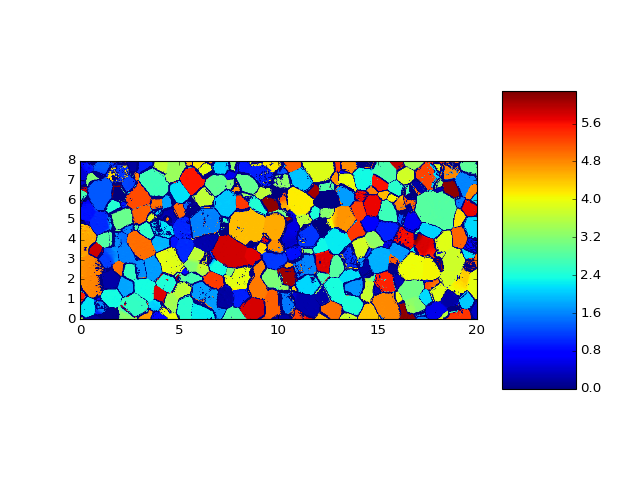

In [4]:
plt.figure()
data.phi1.plot()

### Plot phi and add grain boundaries

<IPython.core.display.Javascript object>


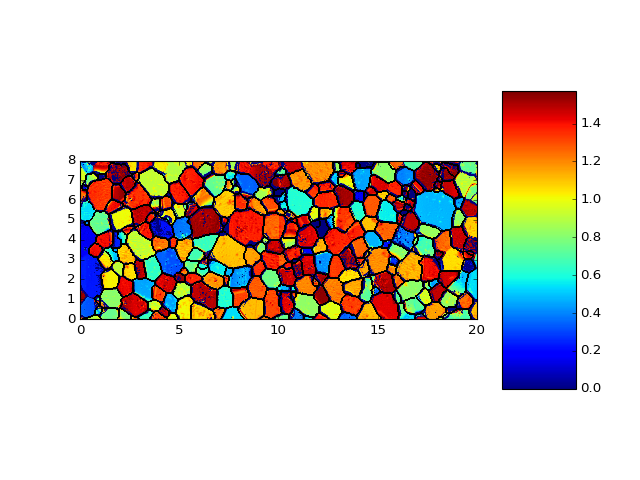

In [5]:
plt.figure()
data.phi.plot()
data.micro.plotBoundary(dilatation=2)

### Plot using a colorwheel
#### The colorwheel

<IPython.core.display.Javascript object>


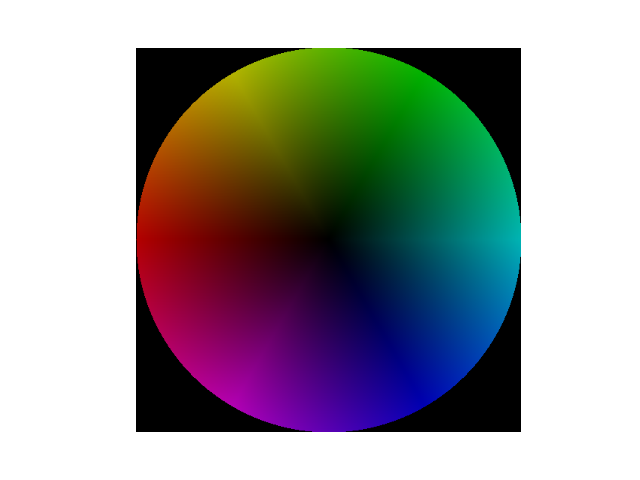

(-0.5, 511.5, 511.5, -0.5)

In [6]:
lut=lda.aita.lut()
plt.figure()
plt.imshow(lut)
plt.axis('off')

#### The colormap

<IPython.core.display.Javascript object>


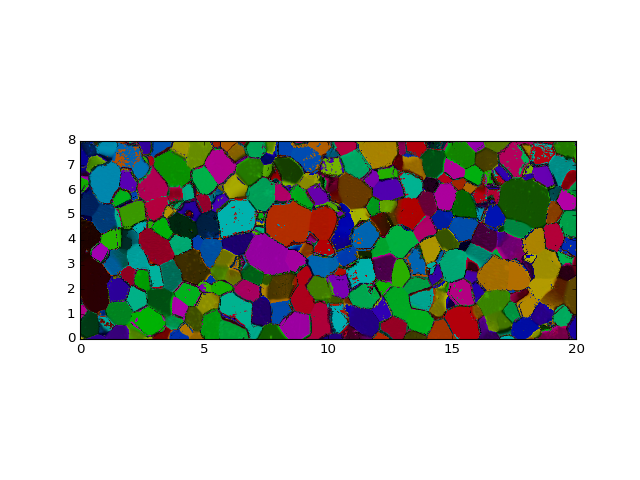

In [7]:
plt.figure()
img=data.plot()

## How to filter data

In [8]:
data.filter(75)

## How to plot pole figure

<IPython.core.display.Javascript object>


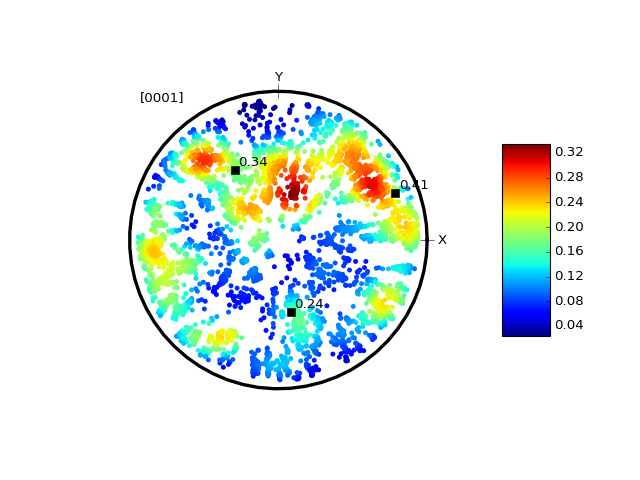

[ 0.41113979  0.34480596  0.24405427]


In [9]:
plt.figure()
eigen_value=data.plotpdf(peigen=True)
print(eigen_value)

## How to use mask

In [10]:
import mask2d

### From a black and white bmp image

In [11]:
m=mask2d.load_mask('mask.bmp',0.02)

<IPython.core.display.Javascript object>


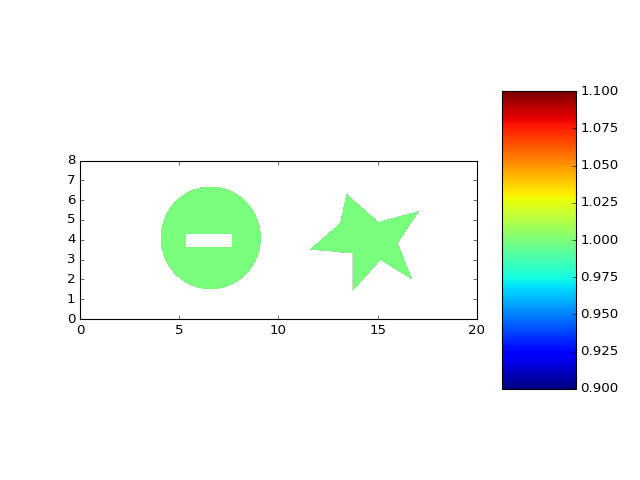

In [12]:
plt.figure()
m.plot()

In [13]:
data_mask=data.mask(m)

Sucessfull aita build !


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


<IPython.core.display.Javascript object>


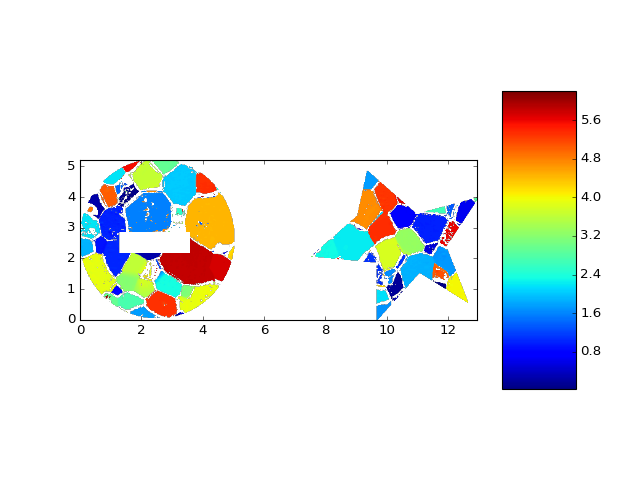

In [14]:
plt.figure()
data_mask.phi1.plot()

### Create mask with only the small grain

In [15]:
import numpy as np
# find small grains ID
id_small=np.where(data.micro.area()<1)
# create mask of small grain
m_small_grain,gId=data.grains.mask_build(grainId=id_small[0])

/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


<IPython.core.display.Javascript object>


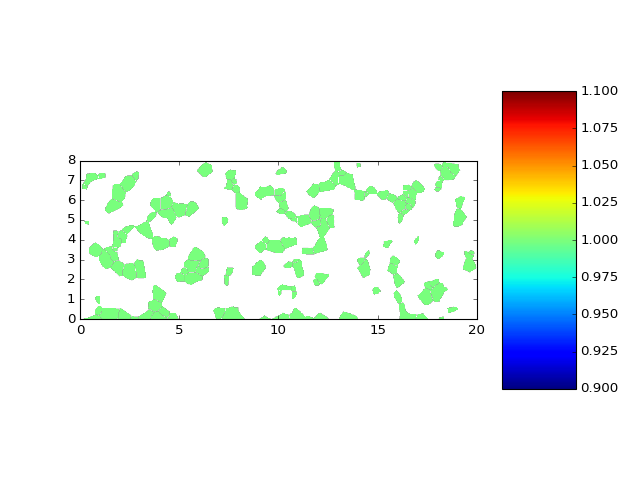

In [16]:
plt.figure()
m_small_grain.plot()

In [17]:
# create new aita object containing only the small grains
data_small_grain=data.mask(m_small_grain)

Sucessfull aita build !


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


<IPython.core.display.Javascript object>


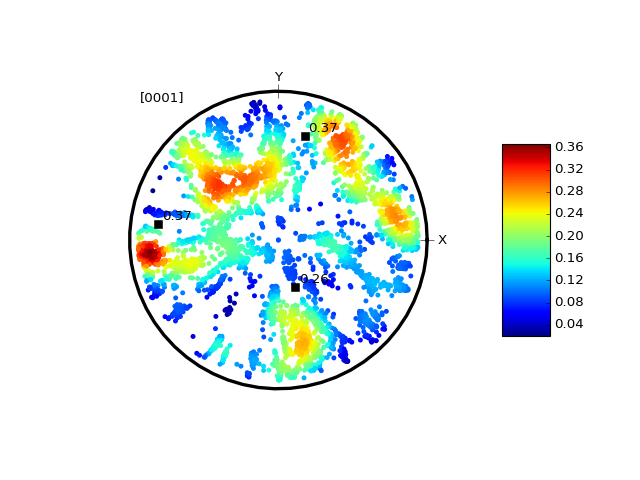

array([ 0.26240298,  0.36987585,  0.36772117], dtype=float32)

In [18]:
# plot pole figure for the small grain.
plt.figure()
data_small_grain.plotpdf(peigen=True)